In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import learning_curve,train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [91]:
cpp = pd.read_csv("cars_dataset.csv")

In [92]:
cpp.shape

(72435, 10)

In [93]:
cpp = cpp.sample(frac = 0.7,axis=0)

In [94]:
cpp.shape

(50704, 10)

In [95]:
cpp.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
6288,A3,2020,26500,Manual,1500,Diesel,145.0,55.4,2.0,audi
38878,Mondeo,2015,7495,Manual,82535,Diesel,0.0,74.3,2.0,Ford
38107,C-MAX,2007,1995,Manual,1995,Petrol,240.0,39.8,1.8,Ford
54716,Corolla,2019,18495,Manual,4774,Petrol,145.0,39.2,1.2,toyota
33919,Fiesta,2019,15000,Manual,3202,Petrol,145.0,60.1,1.0,Ford


In [96]:
cpp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50704 entries, 6288 to 49921
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         50704 non-null  object 
 1   year          50704 non-null  int64  
 2   price         50704 non-null  int64  
 3   transmission  50704 non-null  object 
 4   mileage       50704 non-null  int64  
 5   fuelType      50704 non-null  object 
 6   tax           50704 non-null  float64
 7   mpg           50704 non-null  float64
 8   engineSize    50704 non-null  float64
 9   Make          50704 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 4.3+ MB


In [97]:
cpp.describe()

,year,price,mileage,tax,mpg,engineSize
count,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000
mean,2017.076444,16595.513451,23188.385315,117.085043,55.843924,1.636033
std,2.088272,9308.949800,21241.862125,63.943331,17.409920,0.560224
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10195.000000,7269.000000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17631.500000,145.000000,55.400000,1.600000
75%,2019.000000,20391.000000,32500.000000,145.000000,62.800000,2.000000
max,2020.000000,137995.000000,323000.000000,580.000000,470.800000,6.600000


In [98]:
cpp.shape

(50704, 10)

In [99]:
cpp['Make'].value_counts()

Ford       12556
vw         10558
BMW         7564
audi        7504
toyota      4742
skoda       4387
Hyundai     3393
Name: Make, dtype: int64

In [100]:
cpp.nunique()

model             144
year               25
price            8522
transmission        4
mileage         28729
fuelType            5
tax                45
mpg               171
engineSize         30
Make                7
dtype: int64

## Univariate Analysis

In [101]:
#sns.displot(cpp['year'])

In [102]:
#cpp[cpp['year']<2010].count()

In [103]:
#sns.displot(data=cpp['price'])

In [104]:
#sns.displot(data=cpp['mileage'])

In [105]:
#sns.displot(data=cpp['tax'])

In [106]:
#sns.boxplot(data=cpp['mpg'])

In [107]:
#sns.boxplot(data=cpp['engineSize'])

In [108]:
#Finding Number of outliers 

columns = ['year','price','mileage','tax','mpg','engineSize']
d_v = 0 
d_v1 = 0 
for column in columns:
    iqr = np.percentile(cpp[column],75) - np.percentile(cpp[column],25)
    ll = np.percentile(cpp[column],25) - (1.5 * iqr)
    ul = np.percentile(cpp[column],75) + (1.5 * iqr)
    d_v = d_v +  cpp[(cpp[column]>ul) | (cpp[column]<ll) ][column].count()
    
    #using 3 STD Technique
    ul = np.mean(cpp[column]) + (3*np.std(cpp[column]))
    ll = np.mean(cpp[column]) - (3*np.std(cpp[column]))
    
    d_v1 = d_v1 +  cpp[(cpp[column]>ul) | (cpp[column]<ll) ][column].count()
    
print("The number of outliers in Interquantile range Technique: ",d_v)
print("The number of outliers in 3rd Standard Deviation Technique: ",d_v1)

The number of outliers in Interquantile range Technique:  5932
The number of outliers in 3rd Standard Deviation Technique:  3178


In [109]:
for column in columns:
    iqr = np.percentile(cpp[column],75) - np.percentile(cpp[column],25)
    ll = np.percentile(cpp[column],25) - (1.5 * iqr)
    ul = np.percentile(cpp[column],75) + (1.5 * iqr)
    
    cpp.drop(cpp[(cpp[column]>ul) | (cpp[column]<ll)].index,inplace=True)

In [110]:
cpp.shape

(45657, 10)

In [111]:
cpp.nunique()

model             119
year                9
price            7314
transmission        4
mileage         26472
fuelType            5
tax                26
mpg                94
engineSize         17
Make                7
dtype: int64

In [112]:
cpp['year'].dtype

dtype('int64')

In [113]:
# Data Type Conversion
cpp['model'] = cpp['model'].astype('category')
cpp['year'] = cpp['year'].astype('category')
cpp['transmission'] = cpp['transmission'].astype('category')
cpp['fuelType'] = cpp['fuelType'].astype('category')
cpp['Make'] = cpp['Make'].astype('category')


## Bivariate Analysis

In [114]:
#plt.subplots(figsize=(10, 6))
#sns.heatmap(cpp.corr(),annot=True)

In [115]:
cpp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45657 entries, 6288 to 49921
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         45657 non-null  category
 1   year          45657 non-null  category
 2   price         45657 non-null  int64   
 3   transmission  45657 non-null  category
 4   mileage       45657 non-null  int64   
 5   fuelType      45657 non-null  category
 6   tax           45657 non-null  float64 
 7   mpg           45657 non-null  float64 
 8   engineSize    45657 non-null  float64 
 9   Make          45657 non-null  category
dtypes: category(5), float64(3), int64(2)
memory usage: 2.3 MB


In [116]:
#sns.boxplot(x='year',y='price',data=cpp)

In [117]:
#sns.boxplot(x='fuelType',y='price',data=cpp)

In [118]:
#plt.subplots(figsize=(10, 6))
#sns.scatterplot(x='mileage',y='price',data=cpp)

In [119]:
#sns.boxplot(x='transmission',y='price',data=cpp)

In [120]:
#plt.subplots(figsize=(10, 6))
#sns.scatterplot(x='tax',y='price',data=cpp)

In [121]:
#plt.subplots(figsize=(10, 6))
#sns.scatterplot(x='engineSize',y='price',data=cpp)

In [122]:
#sns.boxplot(x='Make',y='price',data=cpp)

In [123]:
cpp.drop('model', axis = 1,inplace=True)

In [124]:
#One Hot Encoding
cpp_final = pd.get_dummies(cpp)

In [125]:
cpp_final.shape

(45657, 30)

In [126]:
#Splitting the data
features = [col for col in cpp_final.columns if col != 'price']

X_train, X_test, y_train, y_test = train_test_split(cpp_final[features], cpp_final['price'], test_size=.3, random_state=22)
X_train.shape, X_test.shape

((31959, 29), (13698, 29))

In [127]:
#Normalising the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [128]:
#Creating Metrics Dataframe

metrics_df = pd.DataFrame(columns=['Model','MAE','MSE','R2_Score','Train Score','Test Score'])

In [129]:
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train) 


LinearRegression()

In [130]:
pred = linearregression.predict(X_test)   
m0 = 'LinearRegression'
# Mean Absolute Error
m1 = "{:.2f}".format(mean_absolute_error(y_test, pred))
print("\nMean Absolute Error:", mean_absolute_error(y_test, pred))
# RMSE
m2 = mean_squared_error(y_test, pred)**0.5
print("\nRMSE:", mean_squared_error(y_test, pred)**0.5)
# R2 Squared:
m3 = "{:.2f}".format(r2_score(y_test, pred))
print("\nR2 Squared - Score:", r2_score(y_test, pred))
# Training Score
m4 = "{:.2f}".format(linearregression.score(X_train, y_train))
print("\nTraining Score:", linearregression.score(X_train, y_train))
# Testing score
m5 = "{:.2f}".format(linearregression.score(X_test, y_test))
print("\nTesting score:",linearregression.score(X_test, y_test))

metrics_df.loc[0] = [m0,m1,m2,m3,m4,m5]


Mean Absolute Error: 2053.471177513416

RMSE: 2683.5568314716934

R2 Squared - Score: 0.8439786681671604

Training Score: 0.8416289269754009

Testing score: 0.8439786681671604


In [131]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
DTregressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
DTregressor.fit(X_train, y_train) 

DT_y_pred = DTregressor.predict(X_test) 

In [132]:
m0 = 'Decision Tree'
# Mean Absolute Error
m1 = "{:.2f}".format(mean_absolute_error(y_test, DT_y_pred))
print("\nMean Absolute Error:", mean_absolute_error(y_test, DT_y_pred))
# RMSE
m2 = mean_squared_error(y_test, DT_y_pred)**0.5
print("\nRMSE:", mean_squared_error(y_test, DT_y_pred)**0.5)
# R2 Squared:
m3 = "{:.2f}".format(r2_score(y_test, DT_y_pred))
print("\nR2 Squared - Score:", r2_score(y_test, DT_y_pred))
# Training Score
m4 = "{:.2f}".format(DTregressor.score(X_train, y_train))
print("\nTraining Score: %.2f" % (DTregressor.score(X_train, y_train)))
# Testing score
m5 = "{:.2f}".format(DTregressor.score(X_test, y_test))
print("\nTesting score: %.2f" % (DTregressor.score(X_test, y_test)))
#print(y_pred)

metrics_df.loc[1] = [m0,m1,m2,m3,m4,m5]


Mean Absolute Error: 1580.536845316313

RMSE: 2347.6333465682765

R2 Squared - Score: 0.8805948863844646

Training Score: 1.00

Testing score: 0.88


In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

RFregressor = RandomForestRegressor(max_depth=2, random_state=0)
RFregressor.fit(X_train, y_train )

RF_y_pred = RFregressor.predict(X_test)

In [134]:
m0 = 'Random Forest'
# Mean Absolute Error
m1 = "{:.2f}".format(mean_absolute_error(y_test, RF_y_pred))
print("\nMean Absolute Error:", mean_absolute_error(y_test, RF_y_pred))
# RMSE
m2 = mean_squared_error(y_test, RF_y_pred)**0.5
print("\nRMSE:", mean_squared_error(y_test, RF_y_pred)**0.5)
# R2 Squared:
m3 = "{:.2f}".format(r2_score(y_test, RF_y_pred))
print("\nR2 Squared - Score:", r2_score(y_test, RF_y_pred))
# Training Score
m4 = "{:.2f}".format(RFregressor.score(X_train, y_train))
print("\nTraining Score: %.2f" % (RFregressor.score(X_train, y_train)))
# Testing score
m5 = "{:.2f}".format(RFregressor.score(X_test, y_test))
print("\nTesting score: %.2f" % (RFregressor.score(X_test, y_test)))
#print(y_pred)

metrics_df.loc[2] = [m0,m1,m2,m3,m4,m5]


Mean Absolute Error: 3435.7844150583533

RMSE: 4367.215882938487

R2 Squared - Score: 0.5867891579772078

Training Score: 0.58

Testing score: 0.59


In [135]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

GBregressor = GradientBoostingRegressor(random_state=0)
GBregressor.fit(X_train, y_train)

GB_y_pred = GBregressor.predict(X_test)

In [136]:
m0 = 'Gradient Boosting'
# Mean Absolute Error
m1 = "{:.2f}".format(mean_absolute_error(y_test, GB_y_pred))
print("\nMean Absolute Error:", mean_absolute_error(y_test, GB_y_pred))
# RMSE
m2 = mean_squared_error(y_test, GB_y_pred)**0.5
print("\nRMSE:", mean_squared_error(y_test, GB_y_pred)**0.5)
# R2 Squared:
m3 = "{:.2f}".format(r2_score(y_test, GB_y_pred))
print("\nR2 Squared - Score:", r2_score(y_test, GB_y_pred))
# Training Score
m4 = "{:.2f}".format(GBregressor.score(X_train, y_train))
print("\nTraining Score: %.2f" % (GBregressor.score(X_train, y_train)))
# Testing score
m5 = "{:.2f}".format(GBregressor.score(X_test, y_test))
print("\nTesting score: %.2f" % (GBregressor.score(X_test, y_test)))
#print(y_pred)

metrics_df.loc[3] = [m0,m1,m2,m3,m4,m5]


Mean Absolute Error: 1767.3267940393205

RMSE: 2356.7054483448615

R2 Squared - Score: 0.8796702544443208

Training Score: 0.88

Testing score: 0.88


In [137]:
metrics_df

,Model,MAE,MSE,R2_Score,Train Score,Test Score
0,LinearRegression,2053.47,2683.556831,0.84,0.84,0.84
1,Decision Tree,1580.54,2347.633347,0.88,1.00,0.88
2,Random Forest,3435.78,4367.215883,0.59,0.58,0.59
3,Gradient Boosting,1767.33,2356.705448,0.88,0.88,0.88


In [138]:
# K Fold Cross Validation

kf = KFold(n_splits=10, random_state=None)

metrics_df['KF_mean'] = ""
metrics_df['KF_std'] = ""

result = cross_val_score(linearregression, cpp_final[features], cpp_final['price'], cv = kf)
metrics_df.loc[0,'KF_mean'] = "{:.2f}".format(result.mean())
metrics_df.loc[0,'KF_std'] = "{:.2f}".format(result.std())

result = cross_val_score(DTregressor,cpp_final[features], cpp_final['price'], cv = kf)
metrics_df.loc[1,'KF_mean'] = "{:.2f}".format(result.mean())
metrics_df.loc[1,'KF_std'] = "{:.2f}".format(result.std())

result = cross_val_score(RFregressor, cpp_final[features], cpp_final['price'], cv = kf)
metrics_df.loc[2,'KF_mean'] = "{:.2f}".format(result.mean())
metrics_df.loc[2,'KF_std'] = "{:.2f}".format(result.std())

result = cross_val_score(GBregressor, cpp_final[features], cpp_final['price'], cv = kf)
metrics_df.loc[3,'KF_mean'] = "{:.2f}".format(result.mean())
metrics_df.loc[3,'KF_std'] = "{:.2f}".format(result.std())

In [139]:
metrics_df

,Model,MAE,MSE,R2_Score,Train Score,Test Score,KF_mean,KF_std
0,LinearRegression,2053.47,2683.556831,0.84,0.84,0.84,0.84,0.00
1,Decision Tree,1580.54,2347.633347,0.88,1.00,0.88,0.88,0.01
2,Random Forest,3435.78,4367.215883,0.59,0.58,0.59,0.58,0.01
3,Gradient Boosting,1767.33,2356.705448,0.88,0.88,0.88,0.88,0.00


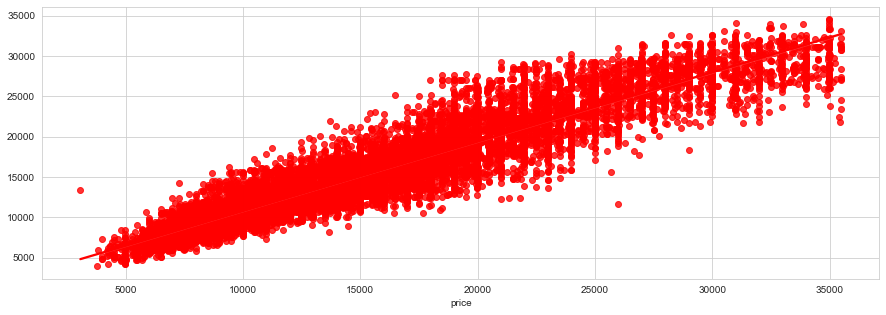

In [140]:
plt.figure(figsize=(15,5))
sns.regplot(x=y_test,y=GB_y_pred,color='red')
plt.show()

In [141]:
GBregressor.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [142]:
#Hyperparameter Tuning using RandomizedSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

parameters = {
    'n_estimators' :[100,150,200],
    'learning_rate':[0.01,0.1,0.5,1],
    #'criterion' : ["mse", "friedman_mse", "mae"],
    'max_depth' : [3,5,7,9]
    #'max_features' : [None,'auto', 'sqrt', 'log2'],
    #'min_samples_split' : [2,5,10,20],
    #'min_samples_leaf':[1,5,10,20]
}

cv = RandomizedSearchCV(estimator=GBregressor,param_distributions=parameters,n_iter=5,n_jobs=-1)
cv.fit(X_train,y_train.values.ravel())

print('Best Parameter {0} \n'.format(cv.best_params_))
print('Best Score {0} \n'.format(cv.best_score_))

Best Parameter {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1} 

Best Score 0.9268882853815132 



In [143]:
#Best Model

gb_regressor=cv.best_estimator_
gb_regressor.fit(X_train, y_train)

hp_GB_y_pred = gb_regressor.predict(X_test)

m0 = 'Hyperparameter Tuned Gradient Boosting(RSC)'
# Mean Absolute Error
m1 = "{:.2f}".format(mean_absolute_error(y_test, hp_GB_y_pred))
print("\nMean Absolute Error:", mean_absolute_error(y_test, hp_GB_y_pred))
# RMSE
m2 = mean_squared_error(y_test, hp_GB_y_pred)**0.5
print("\nRMSE:", mean_squared_error(y_test, hp_GB_y_pred)**0.5)
# R2 Squared:
m3 = "{:.2f}".format(r2_score(y_test, hp_GB_y_pred))
print("\nR2 Squared - Score:", r2_score(y_test, hp_GB_y_pred))
# Training Score
m4 = "{:.2f}".format(gb_regressor.score(X_train, y_train))
print("\nTraining Score: %.2f" % (gb_regressor.score(X_train, y_train)))
# Testing score
m5 = "{:.2f}".format(gb_regressor.score(X_test, y_test))
print("\nTesting score: %.2f" % (gb_regressor.score(X_test, y_test)))
#print(y_pred)
result = cross_val_score(gb_regressor, cpp_final[features], cpp_final['price'], cv = kf)


Mean Absolute Error: 1311.4254885921905

RMSE: 1806.4149062433728

R2 Squared - Score: 0.9293035830533157

Training Score: 0.94

Testing score: 0.93


In [144]:
metrics_df.loc[4] = [m0,m1,m2,m3,m4,m5,"{:.2f}".format(result.mean()),"{:.2f}".format(result.std())]

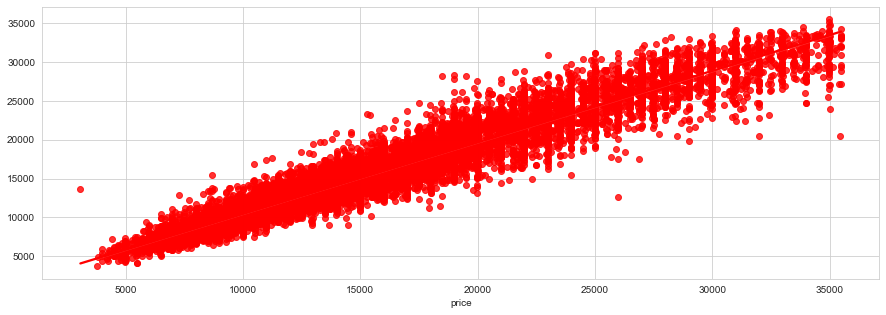

In [145]:
plt.figure(figsize=(15,5))
sns.regplot(x=y_test,y=hp_GB_y_pred,color='red')
plt.show()

In [146]:
metrics_df 

,Model,MAE,MSE,R2_Score,Train Score,Test Score,KF_mean,KF_std
0,LinearRegression,2053.47,2683.556831,0.84,0.84,0.84,0.84,0.00
1,Decision Tree,1580.54,2347.633347,0.88,1.00,0.88,0.88,0.01
2,Random Forest,3435.78,4367.215883,0.59,0.58,0.59,0.58,0.01
3,Gradient Boosting,1767.33,2356.705448,0.88,0.88,0.88,0.88,0.00
4,Hyperparameter Tuned Gradient Boosting(RSC),1311.43,1806.414906,0.93,0.94,0.93,0.93,0.00


In [147]:
#Hyperparameter Using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [148]:
parameters = {
    'n_estimators' :[100,150,200],
    'learning_rate':[0.01,0.1,0.5,1],
    'max_depth' : [3,5,7,9]
}

In [149]:
grid_GBR = GridSearchCV(estimator=GBregressor, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(max_depth=9, n_estimators=150, random_state=0)

 The best score across ALL searched params:
 0.9282178449656139

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 150}


In [150]:
gb_regressor1=grid_GBR.best_estimator_
gb_regressor1.fit(X_train, y_train)

hp_GB_y_pred = gb_regressor1.predict(X_test)

m0 = 'Hyperparameter Tuned Gradient Boosting (GSV)'
# Mean Absolute Error
m1 = "{:.2f}".format(mean_absolute_error(y_test, hp_GB_y_pred))
print("\nMean Absolute Error:", mean_absolute_error(y_test, hp_GB_y_pred))
# RMSE
m2 = mean_squared_error(y_test, hp_GB_y_pred)**0.5
print("\nRMSE:", mean_squared_error(y_test, hp_GB_y_pred)**0.5)
# R2 Squared:
m3 = "{:.2f}".format(r2_score(y_test, hp_GB_y_pred))
print("\nR2 Squared - Score:", r2_score(y_test, hp_GB_y_pred))
# Training Score
m4 = "{:.2f}".format(gb_regressor1.score(X_train, y_train))
print("\nTraining Score: %.2f" % (gb_regressor1.score(X_train, y_train)))
# Testing score
m5 = "{:.2f}".format(gb_regressor1.score(X_test, y_test))
print("\nTesting score: %.2f" % (gb_regressor1.score(X_test, y_test)))
#print(y_pred)
result = cross_val_score(gb_regressor1, cpp_final[features], cpp_final['price'], cv = kf)


Mean Absolute Error: 1187.7562254341628

RMSE: 1683.6746322044564

R2 Squared - Score: 0.9385843965257491

Training Score: 0.97

Testing score: 0.94


In [151]:
metrics_df.loc[5] = [m0,m1,m2,m3,m4,m5,"{:.2f}".format(result.mean()),"{:.2f}".format(result.std())]

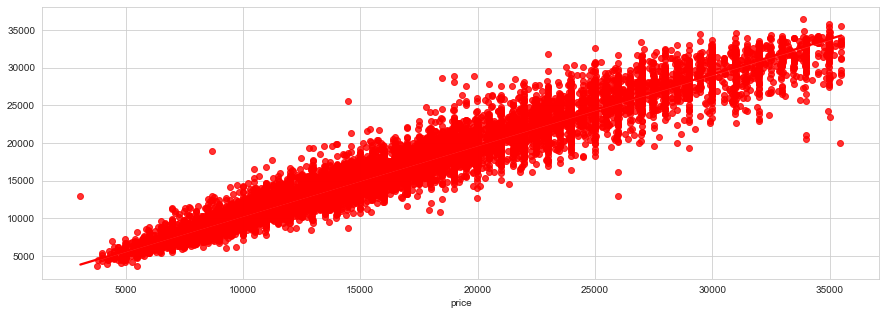

In [152]:
plt.figure(figsize=(15,5))
sns.regplot(x=y_test,y=hp_GB_y_pred,color='red')
plt.show()

In [153]:
print("Our Final Metric Comparision:\n\n")

metrics_df

Our Final Metric Comparision:




,Model,MAE,MSE,R2_Score,Train Score,Test Score,KF_mean,KF_std
0,LinearRegression,2053.47,2683.556831,0.84,0.84,0.84,0.84,0.00
1,Decision Tree,1580.54,2347.633347,0.88,1.00,0.88,0.88,0.01
2,Random Forest,3435.78,4367.215883,0.59,0.58,0.59,0.58,0.01
3,Gradient Boosting,1767.33,2356.705448,0.88,0.88,0.88,0.88,0.00
4,Hyperparameter Tuned Gradient Boosting(RSC),1311.43,1806.414906,0.93,0.94,0.93,0.93,0.00
5,Hyperparameter Tuned Gradient Boosting (GSV),1187.76,1683.674632,0.94,0.97,0.94,0.94,0.00


In [154]:
metrics_df['KF_mean'] = metrics_df['KF_mean'].astype('float64')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'LinearRegression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Gradient Boosting'),
  Text(4, 0, 'Hyperparameter Tuned Gradient Boosting(RSC)'),
  Text(5, 0, 'Hyperparameter Tuned Gradient Boosting (GSV)')])

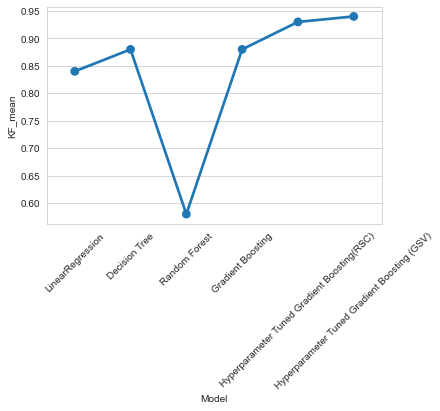

In [155]:
sns.pointplot(x='Model',y='KF_mean',data=metrics_df)
plt.xticks(rotation = 45)

In [156]:
cpp.describe()

,price,mileage,tax,mpg,engineSize
count,45657.000000,45657.000000,45657.000000,45657.000000,45657.000000
mean,15753.190551,20554.130495,116.047594,55.550198,1.570324
std,6754.511374,15903.903535,59.624338,10.388291,0.487806
min,2470.000000,1.000000,0.000000,28.000000,0.000000
25%,10450.000000,7390.000000,125.000000,47.900000,1.000000
50%,14495.000000,17066.000000,145.000000,56.500000,1.500000
75%,19950.000000,30431.000000,145.000000,62.800000,2.000000
max,35600.000000,68829.000000,305.000000,83.100000,3.000000


In [157]:
cpp[cpp['price']>30000]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
55298,2019,33950,Automatic,9125,Hybrid,140.0,49.6,2.5,toyota
5087,2019,31990,Automatic,5000,Diesel,145.0,51.4,2.0,audi
13596,2019,32880,Automatic,5000,Petrol,145.0,41.5,3.0,BMW
7307,2019,33400,Semi-Auto,7021,Petrol,150.0,31.7,2.0,audi
12869,2018,31990,Semi-Auto,99,Petrol,145.0,38.2,3.0,BMW
...,...,...,...,...,...,...,...,...,...
408,2020,31265,Semi-Auto,7963,Petrol,145.0,41.5,2.0,audi
4046,2019,32490,Automatic,8000,Petrol,145.0,37.7,2.0,audi
5308,2019,31490,Automatic,3283,Diesel,145.0,39.2,2.0,audi
40377,2020,32995,Semi-Auto,2131,Petrol,145.0,32.8,2.0,vw


In [158]:
mileage = 42000
tax = 20
mpg = 61.4
engineSize = 1.2
year_2012 = 0
year_2013 = 1
year_2014 = 0
year_2015 = 0
year_2016 = 0
year_2017 = 0
year_2018 = 0
year_2019 = 0
year_2020 = 0
transmission_Automatic = 0
transmission_Manual = 1
transmission_Other = 0
transmission_Semi_Auto = 0
fuelType_Diesel = 0
fuelType_Electric = 0
fuelType_Hybrid = 0
fuelType_Other = 0
fuelType_Petrol = 1
Make_BMW = 0
Make_Ford = 0
Make_Hyundai = 1
Make_audi = 0
Make_skoda = 0
Make_toyota = 0
Make_vw = 0

In [159]:
s2 = gb_regressor1.predict([[mileage,tax,mpg,engineSize,year_2012,year_2013,year_2014,year_2015,year_2016,
                    year_2017,year_2018,year_2019,year_2020,transmission_Automatic,transmission_Manual,
                    transmission_Other,transmission_Semi_Auto,fuelType_Diesel,fuelType_Electric,
                    fuelType_Hybrid,fuelType_Other,fuelType_Petrol,Make_BMW,Make_Ford,Make_Hyundai,
                    Make_audi,Make_skoda,Make_toyota,Make_vw]])

In [160]:
s2

array([10247.73442487])

In [161]:
import pickle
file = open("file.pkl", "wb")
pickle.dump(gb_regressor1, file)

In [162]:
cpp_final.columns

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'year_2018', 'year_2019', 'year_2020', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
       'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol', 'Make_BMW', 'Make_Ford',
       'Make_Hyundai', 'Make_audi', 'Make_skoda', 'Make_toyota', 'Make_vw'],
      dtype='object')